## Exploratory Data Analysis

In [2]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import statsmodels.tsa.seasonal
from statsmodels.tsa.api import ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error
import statsmodels.api as smt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as st 
from statsmodels.graphics.tsaplots import plot_predict
sns.set_context("notebook") 
sns.set_style("ticks")
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [53]:
data = pd.read_csv("data/indexvalue.csv", index_col="Date")
data = data.iloc[:-1]
data = data.iloc[864:]
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%b %Y')
y = data["Value"]


In [54]:
data

,Value
Date,
Dec 1999,1469.25
Jan 2000,1394.46
Feb 2000,1366.42
Mar 2000,1498.58
Apr 2000,1452.43
...,...
Jul 2025,6339.39
Aug 2025,6460.26
Sep 2025,6688.46


In [55]:
print("\nTotal missing values:", y.isna().any().any().sum())


Total missing values: 0


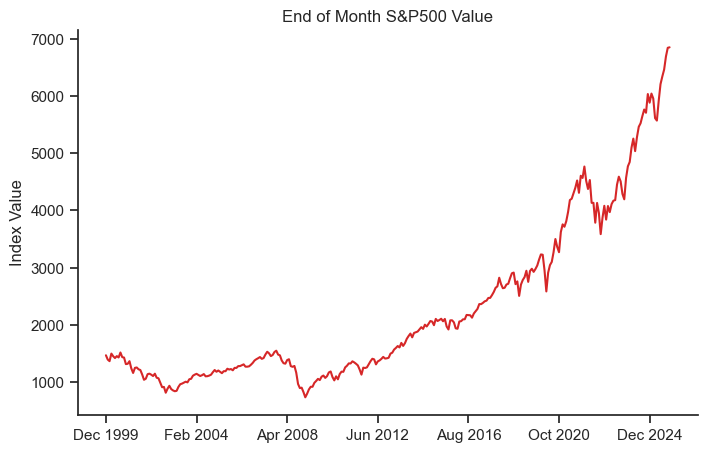

In [56]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Index Value')
ax.set_title('End of Month S&P500 Value')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

### Decomposition

In [57]:
y

Date
Dec 1999    1469.25
Jan 2000    1394.46
Feb 2000    1366.42
Mar 2000    1498.58
Apr 2000    1452.43
             ...   
Jul 2025    6339.39
Aug 2025    6460.26
Sep 2025    6688.46
Oct 2025    6840.20
Nov 2025    6849.09
Name: Value, Length: 312, dtype: float64

In [58]:
window_size = 12
y.index = pd.to_datetime(y.index, format='%b %Y')
decomposition = statsmodels.tsa.seasonal.seasonal_decompose(y, filt=np.repeat(1/window_size, window_size))

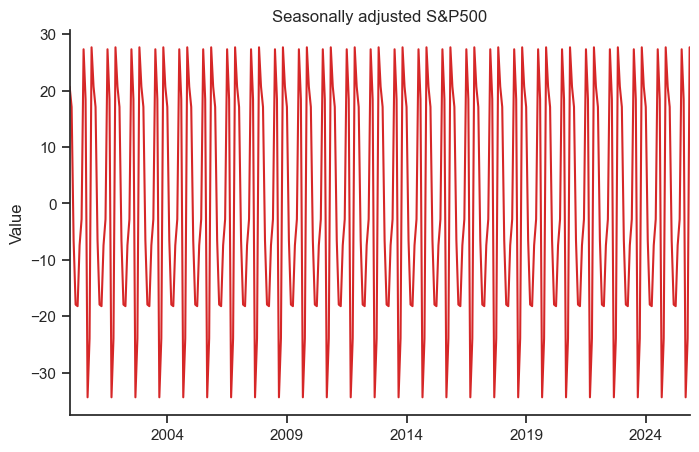

In [59]:
fig, ax= plt.subplots(figsize=(8,5))
decomposition.seasonal.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Value')
ax.set_title('Seasonally adjusted S&P500')
ax.set_xticks([], minor=True) 
sns.despine()
plt.show()

Strong seasonality, additive

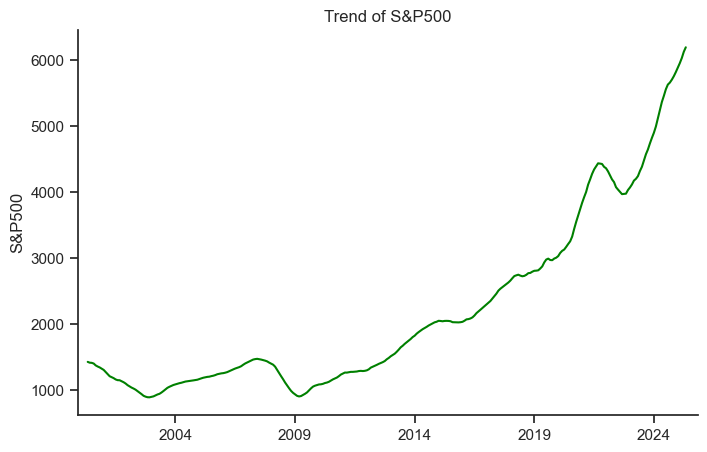

In [60]:
fig, ax= plt.subplots(figsize=(8,5))
decomposition.trend.plot(color="green")
ax.set_xlabel('')
ax.set_ylabel('S&P500')
ax.set_title('Trend of S&P500')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

Long term upward trend, increasing growth rate,      

Cyclical downturns embedded in the trend:
+ Early 2000s: Dot-com bust
+ 2008–2009: Global Financial Crisis (sharp but temporary)
+ 2020: COVID shock (brief, V-shaped)
+ Early 2022: Monetary tightening / inflation shock

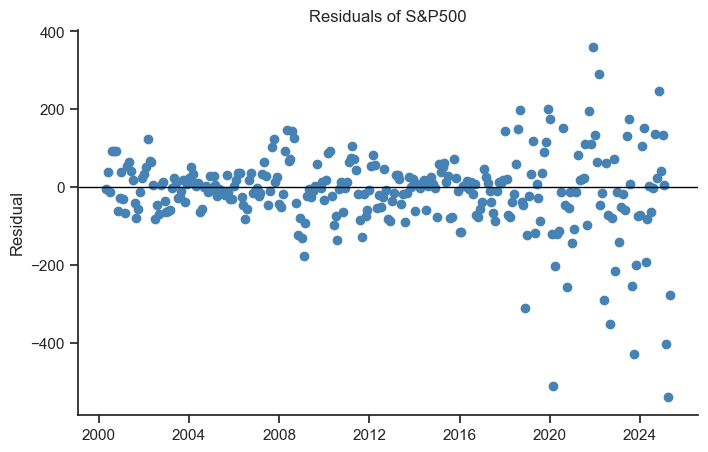

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(decomposition.resid.index, decomposition.resid, color='steelblue')
ax.axhline(0, color='black', linewidth=1)
ax.set_xlabel('')
ax.set_ylabel('Residual')
ax.set_title('Residuals of S&P500')
sns.despine()
plt.show()

Mean ≈ 0, Strong heteroskedasticity, Volatility clustering, Residual increase in magnitude over time.

DO LOG TRANSFORMATION TO STABALISE VARIANCE, also this is nonstationary do differencing.

## ARIMA

In [64]:
data_log = np.log(data)

In [65]:
y_log = data_log["Value"]

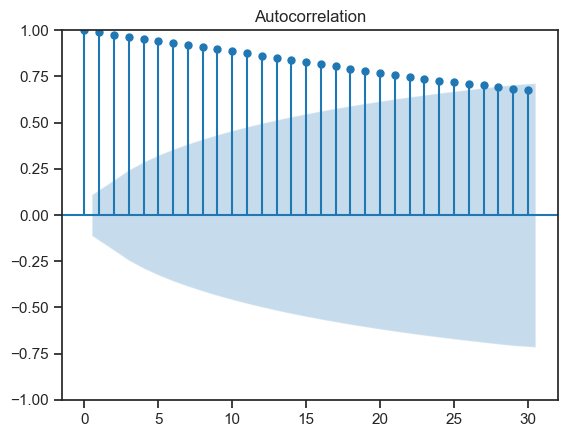

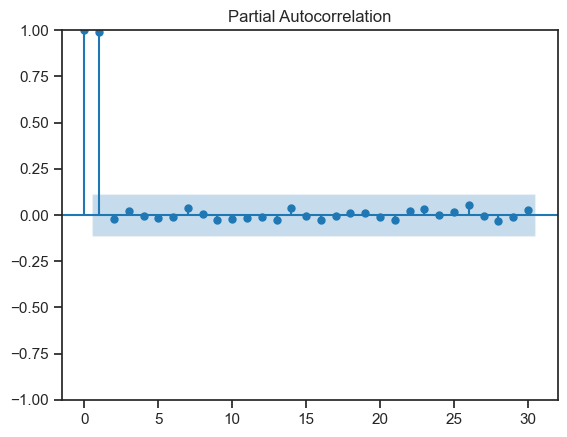

In [67]:
smt.graphics.tsa.plot_acf(data_log, lags=30, alpha = 0.05)

smt.graphics.tsa.plot_pacf(data_log, lags=30, alpha=0.05)
plt.show()

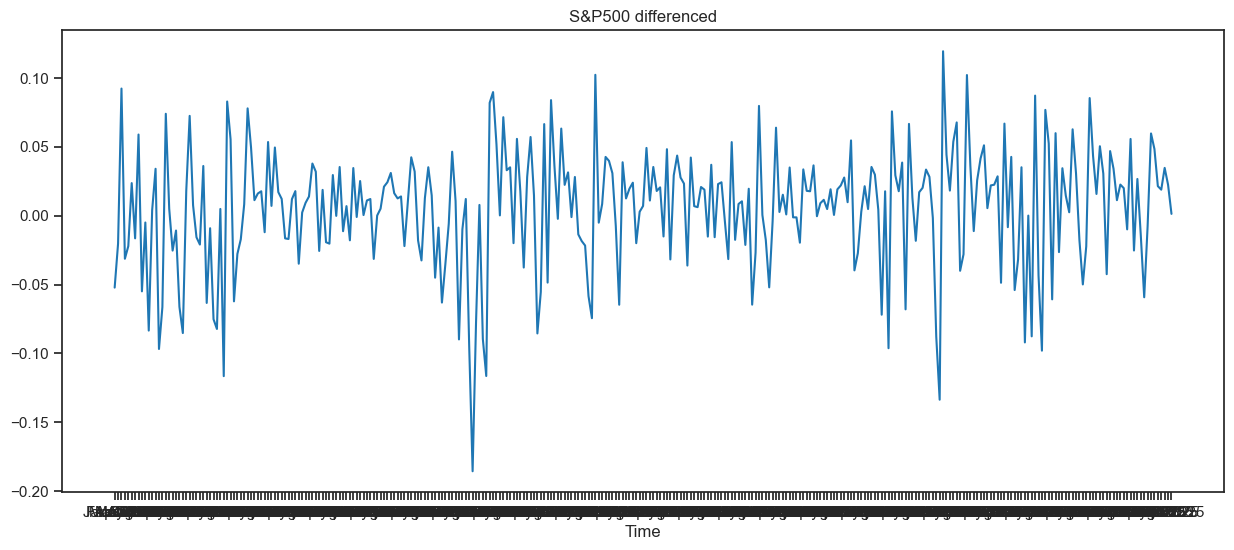

In [73]:
diff_data_org = pd.Series.diff(data_log)
diff_data = diff_data_org.dropna()
diff_data_ts = diff_data.copy()
#diff_data_ts.index = diff_data_ts.index.to_timestamp()

plt.figure(figsize=(15,6))
plt.plot(diff_data_ts)
plt.xlabel('Time')
plt.title('S&P500 differenced')
plt.show()

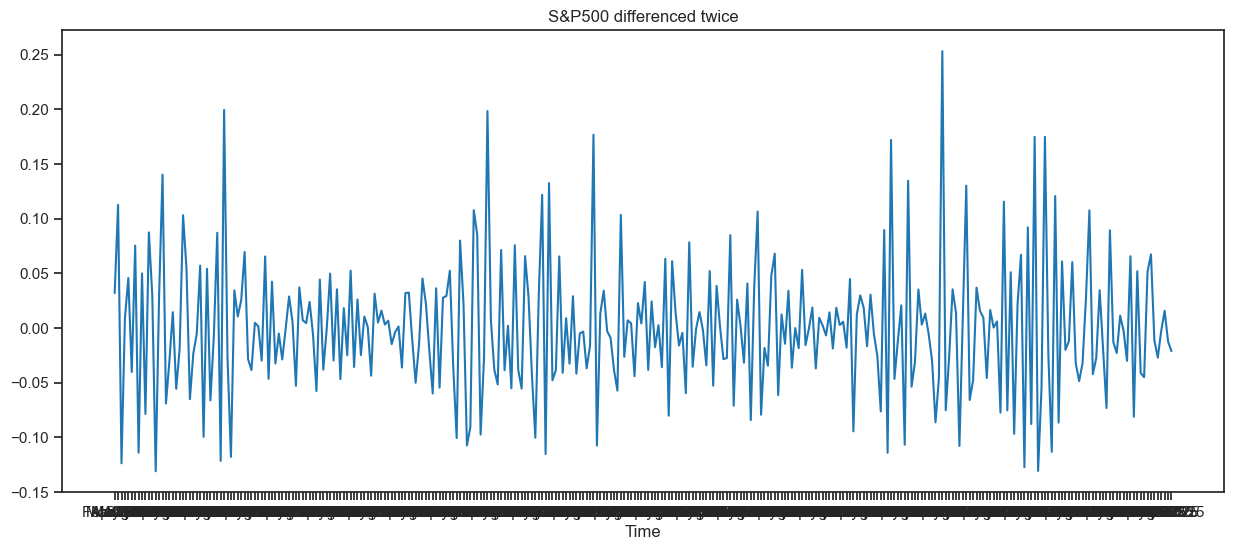

In [74]:
diff_data_org2 = pd.Series.diff(diff_data_org)
diff_data2 = diff_data_org2.dropna()
diff_data_ts2 = diff_data2.copy()
#diff_data_ts.index = diff_data_ts.index.to_timestamp()

plt.figure(figsize=(15,6))
plt.plot(diff_data_ts2)
plt.xlabel('Time')
plt.title('S&P500 differenced twice')
plt.show()

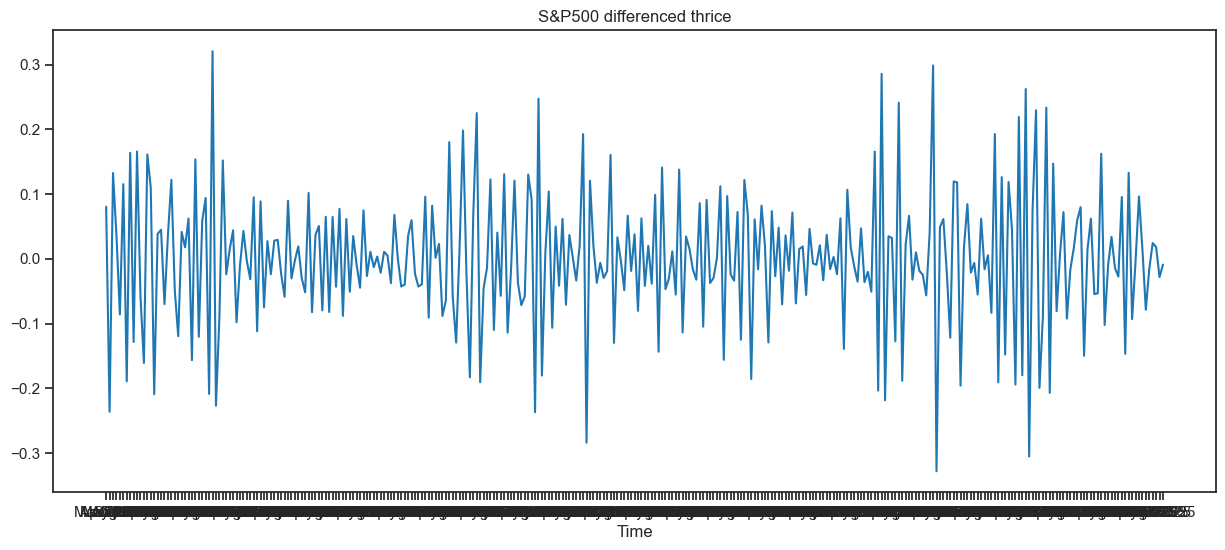

In [75]:
diff_data_org3 = pd.Series.diff(diff_data_org2)
diff_data3 = diff_data_org3.dropna()
diff_data_ts3 = diff_data3.copy()
#diff_data_ts.index = diff_data_ts.index.to_timestamp()

plt.figure(figsize=(15,6))
plt.plot(diff_data_ts3)
plt.xlabel('Time')
plt.title('S&P500 differenced thrice')
plt.show()

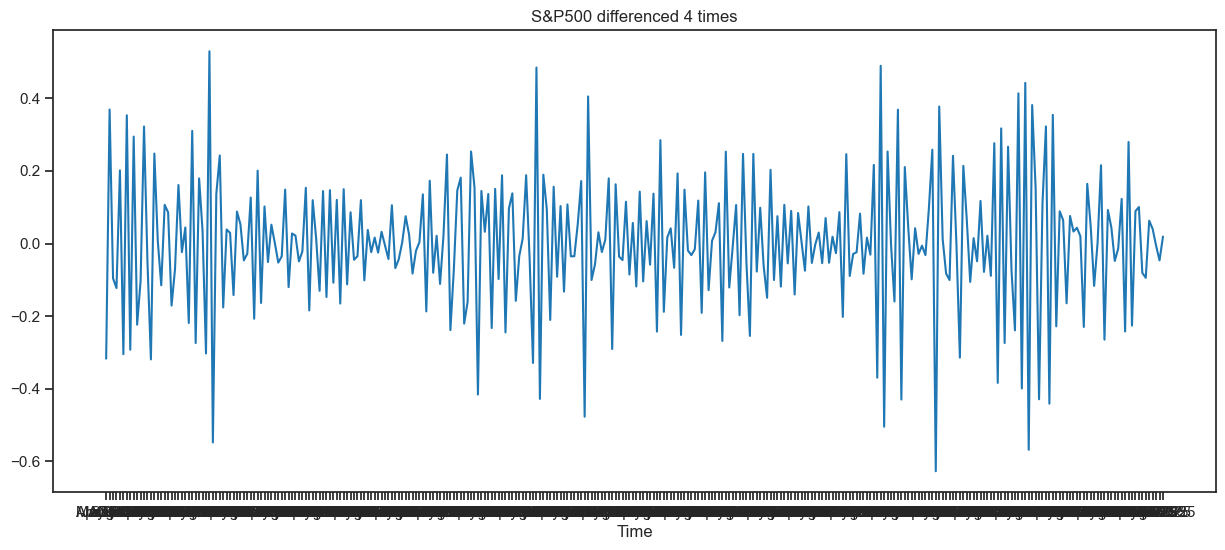

In [76]:
diff_data_org4 = pd.Series.diff(diff_data_org3)
diff_data4 = diff_data_org4.dropna()
diff_data_ts4 = diff_data4.copy()
#diff_data_ts.index = diff_data_ts.index.to_timestamp()

plt.figure(figsize=(15,6))
plt.plot(diff_data_ts4)
plt.xlabel('Time')
plt.title('S&P500 differenced 4 times')
plt.show()